In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns

In [49]:
df=pd.read_csv('Output_files/Data_pre.csv')

In [50]:
df.head()

,property,state,sqft,age,claims,exposure,freq,age_bins
0,0,AZ,88972,83,13,88.972,0.146113,90
1,1,OH,43434,11,11,43.434,0.253258,20
2,2,FL,66035,8,9,66.035,0.136291,10
3,3,AZ,18145,59,12,18.145,0.661339,60
4,4,AZ,74404,50,9,74.404,0.120961,50


In [51]:
df.describe()

,property,sqft,age,claims,exposure,freq,age_bins
count,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000
mean,4196.134487,51000.311609,50.281520,7.621513,51.000312,0.283157,54.758192
std,2431.496417,28599.856068,28.766394,5.776826,28.599856,0.547386,28.831502
min,0.000000,527.000000,0.000000,1.000000,0.527000,0.010001,0.000000
25%,2088.000000,26321.000000,26.000000,3.000000,26.321000,0.071933,30.000000
50%,4188.000000,51465.000000,50.000000,6.000000,51.465000,0.141030,50.000000
75%,6304.000000,75772.000000,75.000000,10.000000,75.772000,0.284091,80.000000
max,8412.000000,99998.000000,99.000000,46.000000,99.998000,14.117647,100.000000


Verify the distribution  in our output varibales Claim and Freq

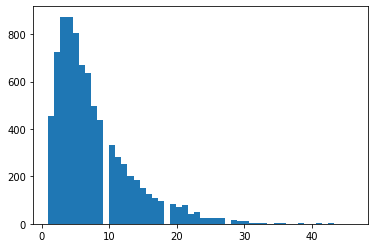

In [52]:
plt.hist(df['claims'],bins=50)
plt.show()

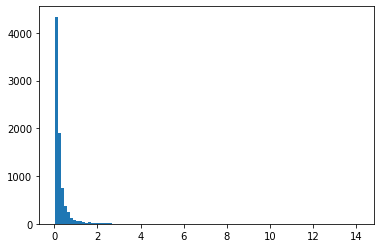

In [53]:
plt.hist(df['freq'],bins=100)
plt.show()

[]

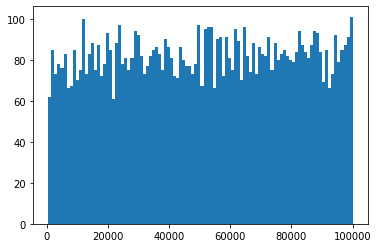

In [54]:
plt.hist(df['sqft'],bins=100)
plt.plot()

C:\Users\Barun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


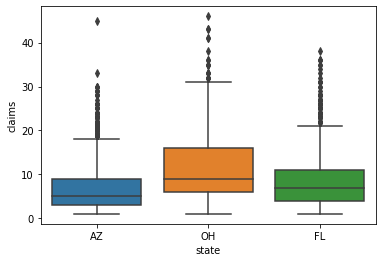

In [59]:
# There is significant pattern between the state and claims
sns.boxplot(df['state'],df['claims'])

C:\Users\Barun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


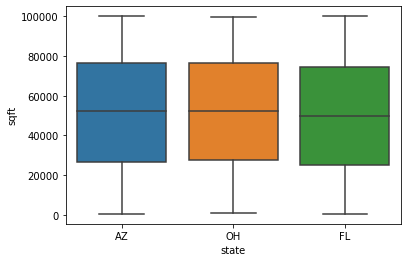

In [41]:
sns.boxplot(df['state'],df['sqft'])

C:\Users\Barun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


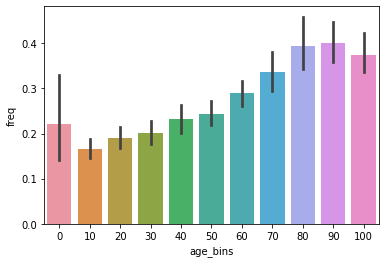

In [43]:
sns.barplot(df['age_bins'],df['freq'])

C:\Users\Barun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


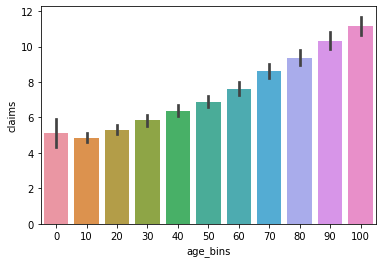

In [58]:
# we see the exp relationhsip between the variables
sns.barplot(df['age_bins'],df['claims'])